In [10]:
import numpy as np
import struct   # this library will be used only in this exercise for binary representation
                # it will not be necessary in the following lectures
import matplotlib.pyplot as plt

# Number types

We will use following types of numbers from Numpy:

**8-bit**
- unsigned char - *np.uint8*
- signed char - *np.int8*

**32 bit**
- unsigned int - *uint*
- signed int - *int*
- float IEEE 754 representation - *np.float32*

**64bit**
- float IEEE 854 representation (double) - *np.float*

https://numpy.org/devdocs/user/basics.types.html

> **Homework**<br>
> Try setting a to different calues and observe the difference between represenations.
> Explain these differences. 

> **For example, for $a=-5.454646546546455$:**<br>
> *uint8* will show $256-5 = 251$ since it supports only positive numbers and $0=256=max_{uint8}$<br>
> *int8* and *int32* show $-5$ as they round the given number $round(a)$
> *float32* will show $-5.454646587371826$, which means, from 8th decimal on the numbers will be wrong as this representation does not provide enough memory for saving the rest of digits accurately

In [11]:
# Try following groups:
# Numbers: 0 - 127
# Numbers: 128 - 255
# Numbers: (-128) - (-1)
# Floats: 25.3
# Really many digits after the decimal point... 

a = -5.454646546546455

print('uint8 number={}, binary representation={}'.format(np.uint8(a), np.binary_repr(np.uint8(a), width=8)))
print('int8 number={}, binary representation={}'.format(np.int8(a), np.binary_repr(np.int8(a), width=8)))
print('int32 number={}, binary representation={}'.format(np.int32(a), np.binary_repr(np.int16(a), width=16)))

print('float32 number={}, binary representation={}'.format(np.float32(a), 
                                                           np.binary_repr(
                                                               struct.unpack_from('L', np.float32(a))[0],
                                                           width=32)))
print('float64 number={}, binary representation={}'.format(np.float64(a), 
                                                           np.binary_repr(
                                                               struct.unpack_from('Q', np.float64(a))[0],
                                                               width=64)))

uint8 number=251, binary representation=11111011
int8 number=-5, binary representation=11111011
int32 number=-5, binary representation=1111111111111011
float32 number=-5.454646587371826, binary representation=11000000101011101000110001110111
float64 number=-5.454646546546455, binary representation=1100000000010101110100011000111011011101010000101010000000011110


## Checking the type and converting to another

In [12]:
a_array = np.array([1, -2, 3])
a_array.dtype

dtype('int32')

In [13]:
a_array.astype(np.float)

array([ 1., -2.,  3.])

In [14]:
a_array.astype(np.uint8)

array([  1, 254,   3], dtype=uint8)

# Normalizing an array to a given range

It will happen often that some function gives as a result values in a certain range.<br>
Often, we will need to map this range to another one that can be used for further processing.

> **Example**<br>
> Random function gives float values from the interval (0, 1).
> Instead of the (0, 1) range, we will want to use some other e.g. [100, 110].

> To map the array $a_{val}$ from the previous to a new range, we will use the following equation:
> ${a_{new}}=\frac{a_{old} - min(a_{old})}{max(a_{old}) - min(a_{old})}\cdot({max_{new} - min_{new}}) + min_{new};$<br>
> $max(a_{old}) - min(a_{old})\neq 0$


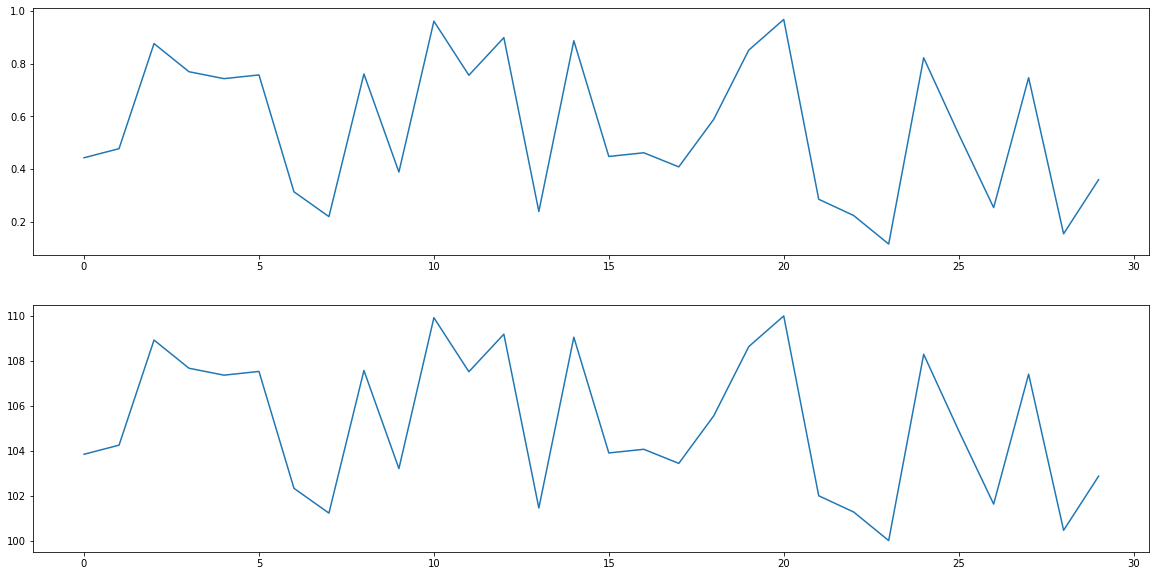

In [15]:
range_new = np.array([100, 110])

plt.figure(figsize=(20,10)) # this is just to set up the image size
a_val = np.random.rand(30)
plt.subplot(211) # this means - it plots the first graph
plt.plot(a_val)

a_val = (range_new[1]-range_new[0])*(a_val - np.min(a_val))/(np.max(a_val)- np.min(a_val)) + range_new[0]
plt.subplot(212)    # this means that the following plot will be on the second subplot position
                    # if you wish to position the second plot right to the first, use plt.subplot(121) 
                    # and plt.subplot(122)
plt.plot(a_val)
# We will see that lines have the same shape, but a different y-scale

# Converting from float to integer

There are several ways to round a float number to an integer:
- *np.round* rounds to the closest number: $[5.25] = 5;$ $[5.87] = 6;$ $[5.5] = 6$ (by convention)
- *np.ceil* rounds up to the upper integer number: $\lceil{5.25}\rceil = 6;$ $\lceil{5.87}\rceil = 6;$ $\lceil{5.5}\rceil = 6$
- *np.floor* rounds down to the lower integer number: $\lfloor{5.25}\rfloor = 5;$ $\lfloor{5.87}\rfloor = 5;$ $\lfloor{5.5}\rfloor = 5$


In [16]:
np.round(5.5)

6.0

> **Homework**<br>
> Explain the following figure and differences between plots.

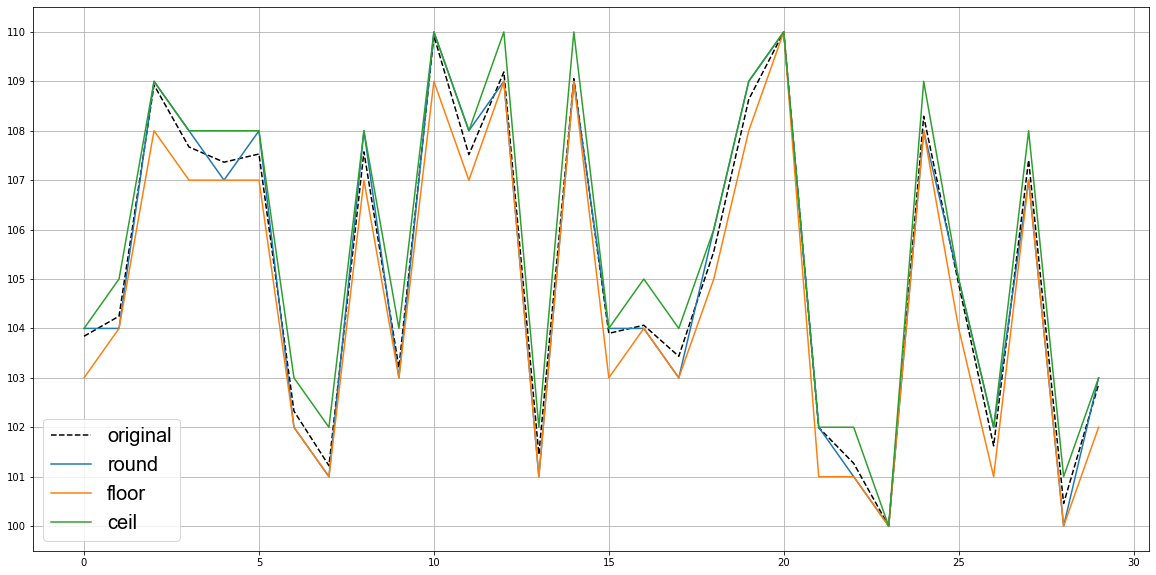

In [17]:
import matplotlib.font_manager as font_manager

a_round = np.round(a_val)
a_floor = np.floor(a_val)
a_ceil = np.ceil(a_val)

font_legend = font_manager.FontProperties(family='Arial',
                                   weight='normal',
                                   style='normal', size=20)

plt.figure(figsize=(20,10)) # this is just to set up the image size
plt.plot(a_val, color='black', linestyle='dashed', label='original')
plt.plot(a_round, label='round')
plt.plot(a_floor, label='floor')
plt.plot(a_ceil, label='ceil')

plt.yticks(np.arange(100,111,1))
plt.grid()
plt.legend(prop=font_legend)